**Cat & Dog Identificator Using Computer Vision: CNN**
<br>Source: https://www.kaggle.com/datasets/chetankv/dogs-cats-images

# Library

In [51]:
#System with python
import os

#Simple visualization & statistic
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

#Advance visualization
import pathlib
import matplotlib.image as mpimg

#Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
import tensorflow as tf

#Image Converter
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# Problem Statement

**Background**

Computer vision is an interdisciplinary scientific field that deals with how computers can gain high-level understanding from digital images or videos. Computer vision have so many benefit to help human live but the first step of that, we need computer to able see the image and interpret correctly. The dogs vs cats identificator is the basic example of image classification (computer vision) where computer must identified if the picture is dog or cat.

**Problem**

Clasify image of dog or cat is easy for humans, but evidence suggests that cats and dogs are particularly difficult to tell apart automatically. Computer cannot see the image directly but need to convert it into number. The simple method using machine learning didnt give statisfaction result. So we need other algortihm to solve that problem. 

**Goal**

The goal of this analysis is to create an algorithm to classify whether an image contains a dog or a cat.

# Load Dataset

## Check Folder

In [2]:
#Check dataset folder 
for dirpath, dirnames, filenames in os.walk("dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'dataset'.
There are 2 directories and 0 images in 'dataset\test_set'.
There are 0 directories and 1000 images in 'dataset\test_set\cats'.
There are 0 directories and 1000 images in 'dataset\test_set\dogs'.
There are 2 directories and 0 images in 'dataset\training_set'.
There are 0 directories and 4000 images in 'dataset\training_set\cats'.
There are 0 directories and 4000 images in 'dataset\training_set\dogs'.


* Train set:
    * Dog = 4000 images
    * Cat = 4000 images
* Test set:
    * Dog = 1000 images
    * Cat = 1000 images

## Labeling

In [3]:
data_dir = pathlib.Path("dataset/training_set/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) #Buat label berdasarkan nama folder.
print(class_names)

['cats' 'dogs']


Target label: cat / dog

## Visualization

### Function

In [4]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}") 
    return img

### Cats

Image shape: (128, 99, 3)


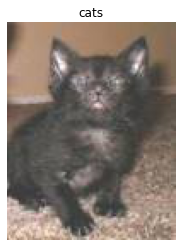

In [5]:
cats = view_random_image(target_dir="dataset/training_set/",
                        target_class="cats")

### Dogs

Image shape: (375, 499, 3)


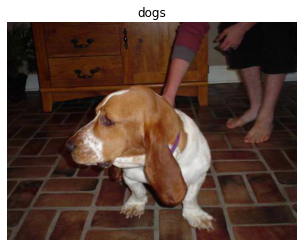

In [6]:
dogs = view_random_image(target_dir="dataset/training_set/",
                  target_class="dogs")

# Baseline

## Preprocessing

### Set Data Train

In [7]:
train_dir = "dataset/training_set/"
test_dir = "dataset/test_set/"

### Normalization

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

### Batching

In [9]:
train_data = train_datagen.flow_from_directory(directory = train_dir, 
                                               batch_size = 32, 
                                               target_size=(224,224), 
                                               class_mode='binary', 
                                               seed=42) 
test_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [10]:
#Check first batch
image,labels= train_data.next()
len(image), len(labels)

(32, 32)

In [11]:
len(train_data), len(test_data)

(250, 63)

* Train data contain 250 batches with 32 images on each batches.
* Test data contain 63 batches with 32 images on each batches.

## Modeling

In [12]:
#Create model
model_1 = Sequential([Conv2D(10, 3, activation = 'relu', input_shape=(224,224,3)),
                      MaxPool2D(),
                      Conv2D(10, 3, activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation = 'sigmoid')],name = 'baseline_model')

#Compile model
model_1.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

#Fit model
history1 = model_1.fit(train_data,
           epochs = 5,
           steps_per_epoch = len(train_data),
           validation_data = test_data,
           validation_steps = len(test_data))

Epoch 1/5
250/250 [==============================] - 94s 372ms/step - loss: 0.6626 - accuracy: 0.5962 - val_loss: 0.6103 - val_accuracy: 0.6800
Epoch 2/5
250/250 [==============================] - 91s 364ms/step - loss: 0.5679 - accuracy: 0.7064 - val_loss: 0.5763 - val_accuracy: 0.6950
Epoch 3/5
250/250 [==============================] - 100s 402ms/step - loss: 0.4959 - accuracy: 0.7569 - val_loss: 0.5729 - val_accuracy: 0.7165
Epoch 4/5
250/250 [==============================] - 99s 395ms/step - loss: 0.4401 - accuracy: 0.7954 - val_loss: 0.5858 - val_accuracy: 0.7150
Epoch 5/5
250/250 [==============================] - 101s 405ms/step - loss: 0.3832 - accuracy: 0.8275 - val_loss: 0.5967 - val_accuracy: 0.7210


## Model Evaluation

In [13]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
   
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

### Performance Score

In [14]:
model_1.evaluate(test_data)

63/63 [==============================] - 11s 170ms/step - loss: 0.5967 - accuracy: 0.7210


[0.5967156291007996, 0.7210000157356262]

### Model Summary

In [15]:
model_1.summary()

Model: "baseline_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 29160)             0         
                                                                 
 dense (Dense)               (None, 1)              

### Visualization

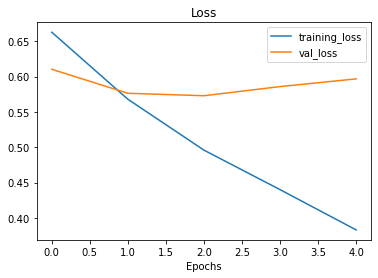

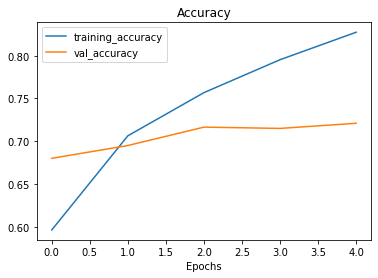

In [16]:
plot_loss_curves(history1)

# Upgrade Model Performance

In [17]:
#Plot the learning Rate vs Loss
def lr_plot(x):
    lrs = 1e-4 * 10**(tf.range(len(x.history['loss']))/20)
    plt.figure(figsize=(10,7))
    plt.semilogx(lrs,x.history['loss'])
    plt.xlabel("Learning Rate")
    plt.ylabel("Loss")
    plt.title("Learning Rate VS Loss")

## Set Learning Rate

In [18]:
#Create model
model_2 = Sequential([Conv2D(10, 3, activation = 'relu', input_shape=(224,224,3)),
                      MaxPool2D(),
                      Conv2D(10, 3, activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation = 'sigmoid')],name = 'learning_rate')

#Compile model
model_2.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

#Callbacks
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/2))

#Fit model
history2 = model_2.fit(train_data,
           epochs = 8,
           callbacks = [lr_scheduler],
           steps_per_epoch = len(train_data),
           validation_data = test_data,
           validation_steps = len(test_data))

Epoch 1/8
250/250 [==============================] - 93s 372ms/step - loss: 0.6724 - accuracy: 0.5585 - val_loss: 0.6420 - val_accuracy: 0.6135 - lr: 1.0000e-04
Epoch 2/8
250/250 [==============================] - 93s 374ms/step - loss: 0.6149 - accuracy: 0.6555 - val_loss: 0.5856 - val_accuracy: 0.6950 - lr: 3.1623e-04
Epoch 3/8
250/250 [==============================] - 94s 377ms/step - loss: 0.5733 - accuracy: 0.6965 - val_loss: 0.5919 - val_accuracy: 0.6825 - lr: 0.0010
Epoch 4/8
250/250 [==============================] - 93s 373ms/step - loss: 0.5748 - accuracy: 0.6994 - val_loss: 0.6418 - val_accuracy: 0.6555 - lr: 0.0032
Epoch 5/8
250/250 [==============================] - 91s 365ms/step - loss: 0.6434 - accuracy: 0.6510 - val_loss: 0.6805 - val_accuracy: 0.5880 - lr: 0.0100
Epoch 6/8
250/250 [==============================] - 89s 357ms/step - loss: 0.6846 - accuracy: 0.5330 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 0.0316
Epoch 7/8
250/250 [==============================]

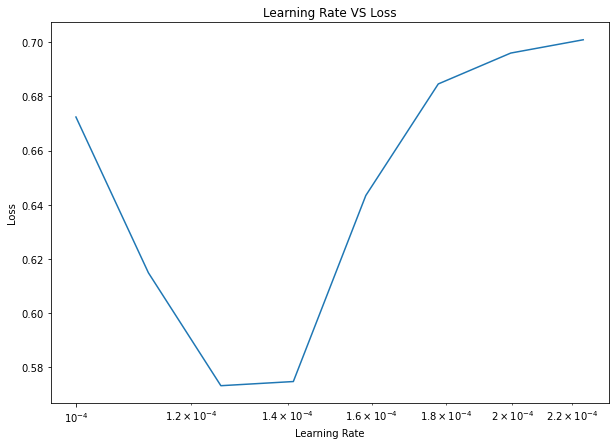

In [19]:
lr_plot(history2)

In [20]:
#Create model
model_3 = Sequential([Conv2D(10, 3, activation = 'relu', input_shape=(224,224,3)),
                      MaxPool2D(),
                      Conv2D(10, 3, activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation = 'sigmoid')],name = 'learning_rate_0.0014')

#Compile model
model_3.compile(loss = 'binary_crossentropy',
                optimizer = Adam(learning_rate = 0.0014),
                metrics = ['accuracy'])

#Fit model
history3 = model_3.fit(train_data,
           epochs = 5,
           steps_per_epoch = len(train_data),
           validation_data = test_data,
           validation_steps = len(test_data))

Epoch 1/5
250/250 [==============================] - 93s 372ms/step - loss: 0.6760 - accuracy: 0.5875 - val_loss: 0.6521 - val_accuracy: 0.6410
Epoch 2/5
250/250 [==============================] - 99s 396ms/step - loss: 0.5989 - accuracy: 0.6781 - val_loss: 0.5955 - val_accuracy: 0.6595
Epoch 3/5
250/250 [==============================] - 94s 374ms/step - loss: 0.5248 - accuracy: 0.7400 - val_loss: 0.5979 - val_accuracy: 0.6905
Epoch 4/5
250/250 [==============================] - 97s 389ms/step - loss: 0.4648 - accuracy: 0.7845 - val_loss: 0.5939 - val_accuracy: 0.6935
Epoch 5/5
250/250 [==============================] - 96s 385ms/step - loss: 0.3927 - accuracy: 0.8226 - val_loss: 0.6391 - val_accuracy: 0.7015


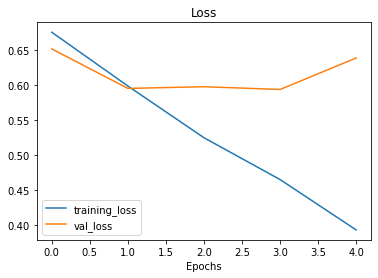

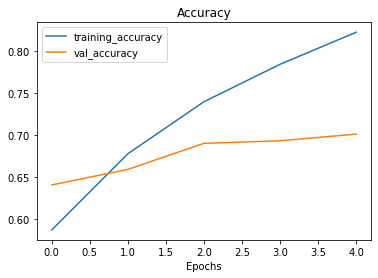

In [21]:
plot_loss_curves(history3)

## Handle Overfitting 1

### Preprocessing

#### Data Augmentation

In [22]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,)

#### Batching

In [23]:
train_data_aug = train_datagen_augmented.flow_from_directory(directory = train_dir, 
                                               batch_size = 32, 
                                               target_size=(224,224), 
                                               class_mode='binary',
                                               shuffle=True,
                                               seed=42) 

Found 8000 images belonging to 2 classes.


### Modeling

In [24]:
#Create model
model_4 = Sequential([Conv2D(10, 3, activation = 'relu', input_shape=(224,224,3)),
                      MaxPool2D(),
                      Conv2D(10, 3, activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation = 'sigmoid')],name = 'model_augmented_1')

#Compile model
model_4.compile(loss = 'binary_crossentropy',
                optimizer = Adam(learning_rate = 0.0014),
                metrics = ['accuracy'])

#Fit model
history4 = model_4.fit(train_data_aug,
           epochs = 5,
           steps_per_epoch = len(train_data_aug),
           validation_data = test_data,
           validation_steps = len(test_data))

Epoch 1/5
250/250 [==============================] - 156s 622ms/step - loss: 0.6731 - accuracy: 0.5924 - val_loss: 0.6259 - val_accuracy: 0.6680
Epoch 2/5
250/250 [==============================] - 158s 630ms/step - loss: 0.6445 - accuracy: 0.6255 - val_loss: 0.6185 - val_accuracy: 0.6375
Epoch 3/5
250/250 [==============================] - 155s 620ms/step - loss: 0.6161 - accuracy: 0.6600 - val_loss: 0.6649 - val_accuracy: 0.6115
Epoch 4/5
250/250 [==============================] - 154s 618ms/step - loss: 0.6070 - accuracy: 0.6681 - val_loss: 0.5688 - val_accuracy: 0.7060
Epoch 5/5
250/250 [==============================] - 152s 609ms/step - loss: 0.5947 - accuracy: 0.6750 - val_loss: 0.5578 - val_accuracy: 0.7175


### Model Evaluation

#### Performance Score

In [25]:
model_4.evaluate(test_data)

63/63 [==============================] - 10s 158ms/step - loss: 0.5578 - accuracy: 0.7175


[0.5578063130378723, 0.7174999713897705]

#### Visualization

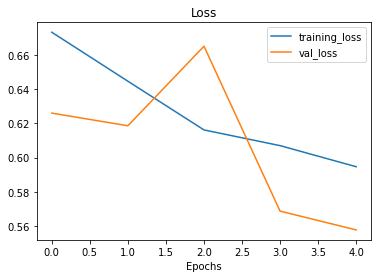

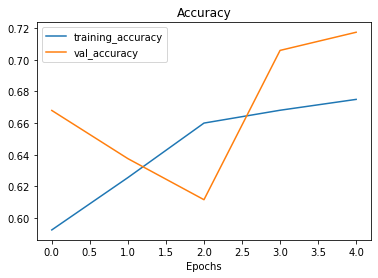

In [26]:
plot_loss_curves(history4)

## Handle Overfitting 2

### Preprocessing

#### Data Augmentation

In [27]:
train_datagen_augmented2 = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2, 
                                             shear_range = 0.2, 
                                             zoom_range = 0.2, 
                                             width_shift_range = 0.2, 
                                             height_shift_range = 0.2, 
                                             horizontal_flip=True)

#### Batching

In [28]:
train_data_aug2 = train_datagen_augmented2.flow_from_directory(directory = train_dir, 
                                               batch_size = 32, 
                                               target_size=(224,224), 
                                               class_mode='binary',
                                               shuffle=True,
                                               seed=42) 

Found 8000 images belonging to 2 classes.


### Modeling

In [29]:
#Create model
model_5 = Sequential([Conv2D(10, 3, activation = 'relu', input_shape=(224,224,3)),
                      MaxPool2D(),
                      Conv2D(10, 3, activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation = 'sigmoid')],name = 'model_augmented_2')

#Compile model
model_5.compile(loss = 'binary_crossentropy',
                optimizer = Adam(learning_rate = 0.0014),
                metrics = ['accuracy'])

#Fit model
history5 = model_5.fit(train_data_aug2,
           epochs = 5,
           steps_per_epoch = len(train_data_aug2),
           validation_data = test_data,
           validation_steps = len(test_data))

Epoch 1/5
250/250 [==============================] - 181s 724ms/step - loss: 0.7134 - accuracy: 0.5465 - val_loss: 0.6622 - val_accuracy: 0.5955
Epoch 2/5
250/250 [==============================] - 168s 672ms/step - loss: 0.6652 - accuracy: 0.5903 - val_loss: 0.6206 - val_accuracy: 0.6370
Epoch 3/5
250/250 [==============================] - 172s 686ms/step - loss: 0.6431 - accuracy: 0.6208 - val_loss: 0.5944 - val_accuracy: 0.6770
Epoch 4/5
250/250 [==============================] - 178s 711ms/step - loss: 0.6184 - accuracy: 0.6576 - val_loss: 0.5701 - val_accuracy: 0.7050
Epoch 5/5
250/250 [==============================] - 175s 701ms/step - loss: 0.6096 - accuracy: 0.6612 - val_loss: 0.5867 - val_accuracy: 0.6805


### Model Evaluation

#### Performance Score

In [30]:
model_5.evaluate(test_data)

63/63 [==============================] - 11s 171ms/step - loss: 0.5867 - accuracy: 0.6805


[0.5867401957511902, 0.6804999709129333]

#### Visualization

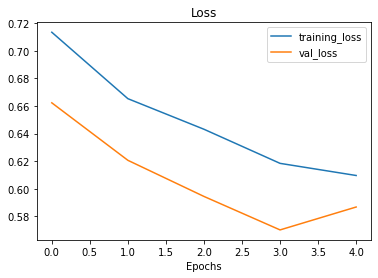

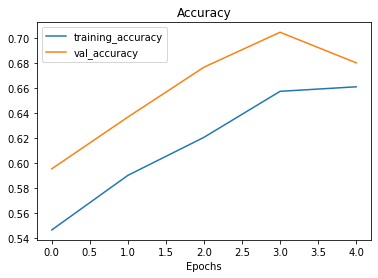

In [31]:
plot_loss_curves(history5)

## Increase Unit Layers

### Modeling

In [32]:
#Create model
model_6 = Sequential([Conv2D(15, 3, activation = 'relu', input_shape=(224,224,3)),
                      MaxPool2D(),
                      Conv2D(15, 3, activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation = 'sigmoid')],name = 'unit_layers')

#Compile model
model_6.compile(loss = 'binary_crossentropy',
                optimizer = Adam(learning_rate = 0.0014),
                metrics = ['accuracy'])

#Fit model
history6 = model_6.fit(train_data_aug2,
           epochs = 5,
           steps_per_epoch = len(train_data_aug2),
           validation_data = test_data,
           validation_steps = len(test_data))

Epoch 1/5
250/250 [==============================] - 193s 769ms/step - loss: 0.6873 - accuracy: 0.5534 - val_loss: 0.6458 - val_accuracy: 0.6295
Epoch 2/5
250/250 [==============================] - 194s 777ms/step - loss: 0.6557 - accuracy: 0.6093 - val_loss: 0.6344 - val_accuracy: 0.6800
Epoch 3/5
250/250 [==============================] - 193s 773ms/step - loss: 0.6513 - accuracy: 0.6319 - val_loss: 0.6195 - val_accuracy: 0.6940
Epoch 4/5
250/250 [==============================] - 191s 763ms/step - loss: 0.6340 - accuracy: 0.6401 - val_loss: 0.6293 - val_accuracy: 0.6790
Epoch 5/5
250/250 [==============================] - 191s 763ms/step - loss: 0.6266 - accuracy: 0.6584 - val_loss: 0.5947 - val_accuracy: 0.6955


### Model Evaluation

#### Performance Score

In [33]:
model_6.evaluate(test_data)

63/63 [==============================] - 13s 198ms/step - loss: 0.5947 - accuracy: 0.6955


[0.5946995615959167, 0.6955000162124634]

#### Visualization

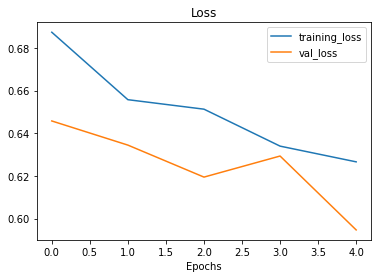

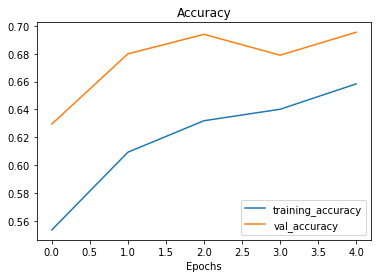

In [34]:
plot_loss_curves(history6)


## Add Layers

### Modeling

In [35]:
#Create model
model_7 = Sequential([Conv2D(10, 3, activation = 'relu', input_shape=(224,224,3)),
                      MaxPool2D(),
                      Conv2D(10, 3, activation = 'relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation = 'sigmoid')],name = 'layers')

#Compile model
model_7.compile(loss = 'binary_crossentropy',
                optimizer = Adam(learning_rate = 0.0014),
                metrics = ['accuracy'])


#Fit model
history7 = model_7.fit(train_data_aug2,
           epochs = 5,
           steps_per_epoch = len(train_data_aug2),
           validation_data = test_data,
           validation_steps = len(test_data))

Epoch 1/5
250/250 [==============================] - 182s 727ms/step - loss: 0.6757 - accuracy: 0.5530 - val_loss: 0.6403 - val_accuracy: 0.6120
Epoch 2/5
250/250 [==============================] - 179s 717ms/step - loss: 0.6631 - accuracy: 0.5990 - val_loss: 0.6507 - val_accuracy: 0.6680
Epoch 3/5
250/250 [==============================] - 176s 704ms/step - loss: 0.6359 - accuracy: 0.6478 - val_loss: 0.6129 - val_accuracy: 0.6715
Epoch 4/5
250/250 [==============================] - 188s 752ms/step - loss: 0.6043 - accuracy: 0.6724 - val_loss: 0.5440 - val_accuracy: 0.7350
Epoch 5/5
250/250 [==============================] - 186s 746ms/step - loss: 0.5838 - accuracy: 0.6837 - val_loss: 0.5534 - val_accuracy: 0.7110


### Model Evaluation

#### Performance Score

In [36]:
model_7.evaluate(test_data)

63/63 [==============================] - 12s 193ms/step - loss: 0.5534 - accuracy: 0.7110


[0.5533971786499023, 0.7110000252723694]

#### Visualization

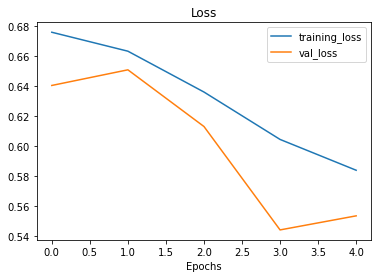

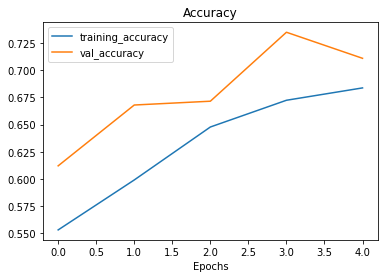

In [37]:
plot_loss_curves(history7)

## Increase Epochs

### Modeling

In [39]:
#Create model
model_8 = Sequential([Conv2D(10, 3, activation = 'relu', input_shape=(224,224,3)),
                      MaxPool2D(),
                      Conv2D(10, 3, activation = 'relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation = 'sigmoid')],name = 'increase_epochs')

#Compile model
model_8.compile(loss = 'binary_crossentropy',
                optimizer = Adam(learning_rate = 0.0014),
                metrics = ['accuracy'])


#Callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)

#Fit model
history8 = model_8.fit(train_data_aug2,
           epochs = 20,
           steps_per_epoch = len(train_data_aug2),
           validation_data = test_data,
           validation_steps = len(test_data))

Epoch 1/20
250/250 [==============================] - 182s 725ms/step - loss: 0.6685 - accuracy: 0.5764 - val_loss: 0.6355 - val_accuracy: 0.6195
Epoch 2/20
250/250 [==============================] - 180s 719ms/step - loss: 0.6455 - accuracy: 0.6131 - val_loss: 0.6123 - val_accuracy: 0.6395
Epoch 3/20
250/250 [==============================] - 181s 724ms/step - loss: 0.6235 - accuracy: 0.6409 - val_loss: 0.5681 - val_accuracy: 0.6890
Epoch 4/20
250/250 [==============================] - 179s 717ms/step - loss: 0.6131 - accuracy: 0.6572 - val_loss: 0.5540 - val_accuracy: 0.7045
Epoch 5/20
250/250 [==============================] - 179s 714ms/step - loss: 0.5876 - accuracy: 0.6793 - val_loss: 0.5687 - val_accuracy: 0.7050
Epoch 6/20
250/250 [==============================] - 171s 685ms/step - loss: 0.5731 - accuracy: 0.6948 - val_loss: 0.5155 - val_accuracy: 0.7490
Epoch 7/20
250/250 [==============================] - 151s 605ms/step - loss: 0.5685 - accuracy: 0.7004 - val_loss: 0.5623 -

### Model Evaluation

#### Performance Score

In [40]:
model_8.evaluate(test_data)

63/63 [==============================] - 8s 127ms/step - loss: 0.4492 - accuracy: 0.7935


[0.4492166042327881, 0.7935000061988831]

#### Visualization

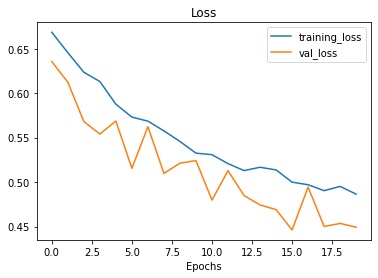

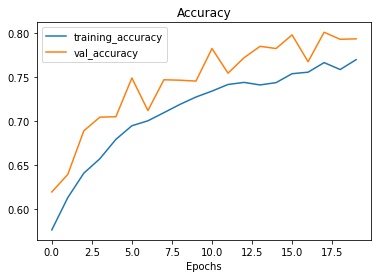

In [41]:
plot_loss_curves(history8)

**We will use model_8**

In [46]:
model_8.summary()

Model: "layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 26, 26, 10)       0    

# Prediction

## Image Converter Function

In [64]:
def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size = [img_shape, img_shape])
    img = img/255.
    return img

In [61]:
# load and prepare the image
def pred_and_plot(model, filename, class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[int(tf.round(pred)[0][0])]
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

## Image Prediction

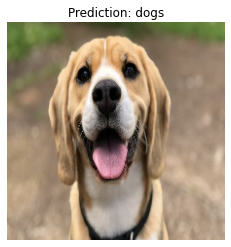

In [65]:
pred_and_plot(model_8, "test1.jpg", class_names)

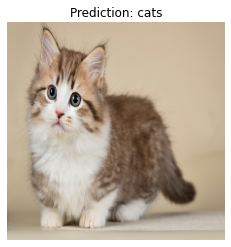

In [66]:
pred_and_plot(model_8, "test2.jpg", class_names)

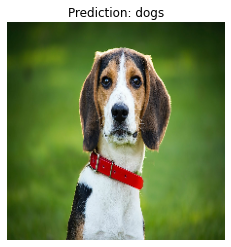

In [67]:
pred_and_plot(model_8, "test3.jpg", class_names)

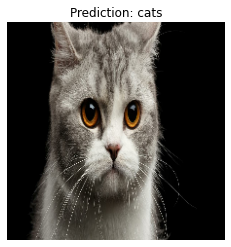

In [68]:
pred_and_plot(model_8, "test4.jpg", class_names)